## 263 - Using XArray Multidimensional Groupby for Global Mean Temperatures

[Youtube](https://www.youtube.com/watch?v=SuoaFOhPKX4)

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import xarray as xr
from metpy.cbook import get_test_data

In [8]:
ds = xr.open_dataset(get_test_data('narr_example.nc', False)).metpy.parse_cf()
ds

<xarray.Dataset>
Dimensions:              (time: 1, isobaric: 29, y: 118, x: 292)
Coordinates:
  * time                 (time) datetime64[ns] 1987-04-04T18:00:00
  * isobaric             (isobaric) float64 1e+03 975.0 950.0 ... 125.0 100.0
  * y                    (y) float64 -3.087e+06 -3.054e+06 ... 7.114e+05
  * x                    (x) float64 -3.977e+06 -3.945e+06 ... 5.47e+06
    metpy_crs            object Projection: lambert_conformal_conic
Data variables:
    Temperature          (time, isobaric, y, x) float32 ...
    Lambert_Conformal    |S1 ...
    lat                  (y, x) float64 ...
    lon                  (y, x) float64 ...
    u_wind               (time, isobaric, y, x) float32 ...
    v_wind               (time, isobaric, y, x) float32 ...
    Geopotential_height  (time, isobaric, y, x) float32 ...
    Specific_humidity    (time, isobaric, y, x) float32 ...
Attributes: (12/14)
    Conventions:              CF-1.0
    Originating_center:       US National Weather Service - NCEP(WMC) (7)
    Originating_subcenter:    The North American Regional Reanalysis (NARR) P...
    Generating_Model:         North American Regional Reanalysis (NARR)
    Product_Type:             Forecast/Uninitialized Analysis/Image Product
    title:                    US National Weather Service - NCEP(WMC) North A...
    ...                       ...
    history:                  Direct read of GRIB-1 into NetCDF-Java 4 API
    CF:feature_type:          GRID
    file_format:              GRIB-1
    location:                 /nomads3_data/raid2/noaaport/merged/narr/198704...
    _CoordinateModelRunDate:  1987-04-04T18:00:00Z
    History:                  Translated to CF-1.0 Conventions by Netcdf-Java...

In [9]:
ds = ds.set_coords(['lat', 'lon'])
ds

<xarray.Dataset>
Dimensions:              (time: 1, isobaric: 29, y: 118, x: 292)
Coordinates:
  * time                 (time) datetime64[ns] 1987-04-04T18:00:00
  * isobaric             (isobaric) float64 1e+03 975.0 950.0 ... 125.0 100.0
  * y                    (y) float64 -3.087e+06 -3.054e+06 ... 7.114e+05
  * x                    (x) float64 -3.977e+06 -3.945e+06 ... 5.47e+06
    metpy_crs            object Projection: lambert_conformal_conic
    lat                  (y, x) float64 ...
    lon                  (y, x) float64 ...
Data variables:
    Temperature          (time, isobaric, y, x) float32 ...
    Lambert_Conformal    |S1 ...
    u_wind               (time, isobaric, y, x) float32 ...
    v_wind               (time, isobaric, y, x) float32 ...
    Geopotential_height  (time, isobaric, y, x) float32 ...
    Specific_humidity    (time, isobaric, y, x) float32 ...
Attributes: (12/14)
    Conventions:              CF-1.0
    Originating_center:       US National Weather Service - NCEP(WMC) (7)
    Originating_subcenter:    The North American Regional Reanalysis (NARR) P...
    Generating_Model:         North American Regional Reanalysis (NARR)
    Product_Type:             Forecast/Uninitialized Analysis/Image Product
    title:                    US National Weather Service - NCEP(WMC) North A...
    ...                       ...
    history:                  Direct read of GRIB-1 into NetCDF-Java 4 API
    CF:feature_type:          GRID
    file_format:              GRIB-1
    location:                 /nomads3_data/raid2/noaaport/merged/narr/198704...
    _CoordinateModelRunDate:  1987-04-04T18:00:00Z
    History:                  Translated to CF-1.0 Conventions by Netcdf-Java...

In [10]:
lat_bins = np.arange(0, 91, 2)
lat_bins

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90])

In [11]:
bin_centers = np.arange(1, 90, 2)
bin_centers

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89])

In [12]:
mean_temperature = ds.Temperature.groupby_bins('lat', lat_bins, labels = bin_centers).mean(xr.ALL_DIMS)
mean_temperature

<xarray.DataArray 'Temperature' (lat_bins: 45)>
array([      nan,       nan,       nan,       nan,       nan, 263.43253,
       262.8568 , 262.3671 , 261.64062, 260.88962, 259.7559 , 258.6793 ,
       257.89874, 256.83627, 255.71082, 254.6859 , 253.79382, 253.0012 ,
       252.3764 , 251.92273, 251.36388, 250.81284, 250.46474, 250.20267,
       249.94543, 249.71645, 249.64513, 249.8442 , 250.68506,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan], dtype=float32)
Coordinates:
  * lat_bins   (lat_bins) int64 1 3 5 7 9 11 13 15 ... 75 77 79 81 83 85 87 89
    metpy_crs  object Projection: lambert_conformal_conic
Attributes:
    units:                         K
    long_name:                     Temperature @ isobaric
    grid_mapping:                  Lambert_Conformal
    GRIB_param_name:               Temperature
    GRIB_param_short_name:         TMP
    GRIB_center_id:                7
    GRIB_table_id:                 131
    GRIB_param_number:             11
    GRIB_param_id:                 [  1   7 131  11]
    GRIB_product_definition_type:  Initialized analysis product
    GRIB_level_type:               100
    GRIB_VectorComponentFlag:      gridRelative

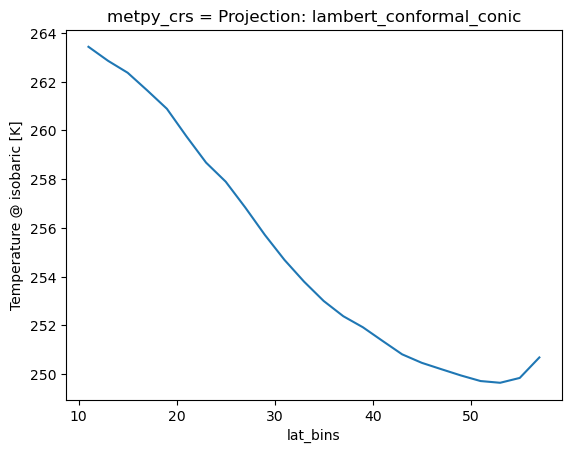

In [13]:
mean_temperature.plot()

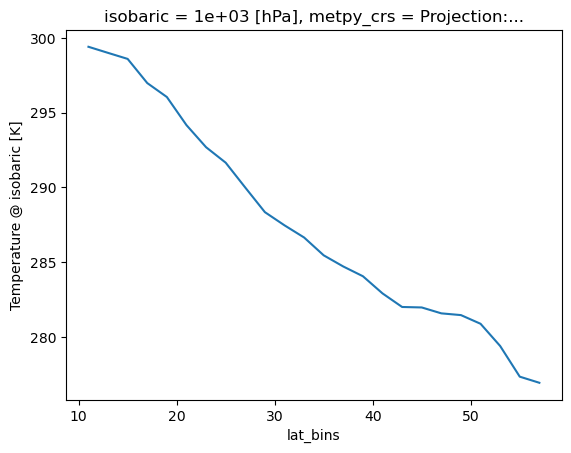

In [14]:
mean_temperature = ds.Temperature.sel(isobaric = 1000.).groupby_bins('lat', lat_bins, labels = bin_centers).mean(xr.ALL_DIMS)
mean_temperature.plot()

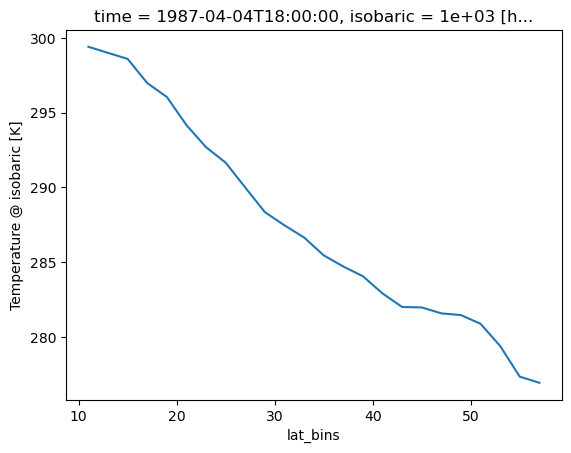

In [15]:
mean_temperature = ds.Temperature.sel(isobaric = 1000.).isel(time = 0).groupby_bins('lat', lat_bins, labels = bin_centers).mean(xr.ALL_DIMS)
mean_temperature.plot()

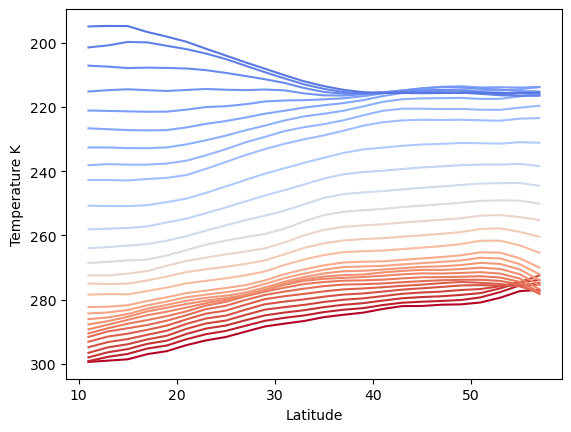

In [16]:
cmap = matplotlib.cm.get_cmap('coolwarm')
for l in ds.isobaric:
	mean_temperature = ds.Temperature.sel(isobaric = l).groupby_bins('lat', lat_bins, labels = bin_centers).mean(xr.ALL_DIMS)
	c = cmap(l / np.max(ds.isobaric))
	plt.plot(bin_centers, mean_temperature, label = l, c = c)
plt.xlabel('Latitude')
plt.ylabel('Temperature K')
plt.gca().invert_yaxis()